In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
item_categories = pd.read_csv("./Extras/item_categories_en.csv")
item_categories.head(5)

,item_category_name,item_category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4


In [3]:
item = pd.read_csv('./Extras/items_en.csv')
item.head(5)

,item_name,item_id,item_category_id
0,! POWER IN glamor (PLAST.) D,0,40
1,! ABBYY FineReader 12 Professional Edition Ful...,1,76
2,*** In the glory (UNV) D,2,40
3,*** BLUE WAVE (Univ) D,3,40
4,*** BOX (GLASS) D,4,40


In [4]:
sale_train = pd.read_csv("sales_train.csv")
sale_train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
shop = pd.read_csv("./Extras/shops_en.csv")
shop.head(5)

,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 Franc",0
1,"! Yakutsk TC ""Central"" Franc",1
2,"Adygea TC ""Mega""",2
3,"Balashikha TRC ""October-Kinomir""",3
4,"Volzhsky mall ""Volga Mall""",4


In [6]:
test = pd.read_csv("test.csv")
test.head(5)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [7]:
df_eda = pd.merge(sale_train, shop, how='left', left_on = 'shop_id', right_on = 'shop_id')
df_eda = pd.merge(df_eda, item, how='left', left_on='item_id', right_on='item_id')
df_eda = pd.merge(df_eda, item_categories, how='left', left_on='item_category_id', right_on='item_category_id')
df_eda.drop(['item_id', 'item_category_id', 'shop_id'], axis=1, inplace=True)
df_eda.head()


,date,date_block_num,item_price,item_cnt_day,shop_name,item_name,item_category_name
0,02.01.2013,0,999.00,1.0,"Yaroslavl shopping center ""Altair""",Scene 2012 (BD),Movies - Blu-Ray
1,03.01.2013,0,899.00,1.0,"Moscow TRC ""Atrium""",DEEP PURPLE The House Of Blue Light LP,Music - Vinyl
2,05.01.2013,0,899.00,-1.0,"Moscow TRC ""Atrium""",DEEP PURPLE The House Of Blue Light LP,Music - Vinyl
3,06.01.2013,0,1709.05,1.0,"Moscow TRC ""Atrium""",DEEP PURPLE Who Do You Think We Are LP,Music - Vinyl
4,15.01.2013,0,1099.00,1.0,"Moscow TRC ""Atrium""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),Music - CD production firm


In [8]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   item_price          float64
 3   item_cnt_day        float64
 4   shop_name           object 
 5   item_name           object 
 6   item_category_name  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 179.2+ MB


In [9]:
df_eda.date = pd.to_datetime(df_eda.date)

c:\Users\minht\.conda\envs\DataScience\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\minht\.conda\envs\DataScience\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\minht\.conda\envs\DataScience\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\minht\.conda\envs\DataScience\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26

In [10]:
df_eda[df_eda.duplicated()]

,date,date_block_num,item_price,item_cnt_day,shop_name,item_name,item_category_name
76962,2013-05-01,0,149.0,1.0,"Khimki TC ""Mega""",STUDENT diviners (region),Movie - DVD
1435367,2014-02-23,13,999.0,1.0,"Tyumen SC ""Goodwin""","Far Cry 3 (Classics) [Xbox 360, Russian version]",Games - XBOX 360
1496766,2014-03-23,14,999.0,1.0,"Moscow MTRTS ""Afi Mall""","Far Cry 3 (Classics) [Xbox 360, Russian version]",Games - XBOX 360
1671873,2014-01-05,16,999.0,1.0,"Tyumen SC ""Goodwin""","Far Cry 3 (Classics) [Xbox 360, Russian version]",Games - XBOX 360
1866340,2014-12-07,18,999.0,1.0,"Moscow TRC ""Atrium""","Far Cry 3 (Classics) [Xbox 360, Russian version]",Games - XBOX 360
2198566,2014-12-31,23,499.0,1.0,"St. Petersburg TK ""Nevsky Center""",RAIN MAN (BD),Movies - Blu-Ray


In [11]:
print(df_eda.shop_name.unique(), sep="\n")
print(len(df_eda.shop_name.unique()))

['Yaroslavl shopping center "Altair"' 'Moscow TRC "Atrium"'
 'Moscow TK "Budenovsky" (pav.K7)' 'Moscow TK "Budenovsky" (pav.A2)'
 'Kursk TC "Pushkin"' 'Moscow Shop C21' 'Krasnoyarsk SC "June"'
 'Moscow MTRTS "Afi Mall"'
 'Moscow shopping center "MEGA Teply Stan" II of'
 'Moscow shopping center "MEGA Belaya Dacha II"'
 'Moscow shopping center "New Age" (Novokosino)'
 'Moscow shopping mall "area" (Belyaevo)' 'Volzhsky mall "Volga Mall"'
 'Voronezh (Plekhanovskaya, 13)' 'Adygea TC "Mega"'
 'Balashikha TRC "October-Kinomir"' 'Voronezh TRC "Maksimir"'
 '! Yakutsk Ordzhonikidze, 56 Franc' '! Yakutsk TC "Central" Franc'
 'Kolomna TC "Rio"' 'Kaluga SEC "XXI Century"'
 'Voronezh TRC City-Park "City"' 'Zhukovsky Street. Chkalov 39m?'
 'Kazan shopping mall of "Parkhouse" II of'
 'Kazan shopping center "Bahetle"' 'Shop Online Emergencies'
 'Ufa TC "Family" 2' 'Moscow shopping center "Semyonov"'
 'Moscow TC "Perlovskiy"' 'Moscow shopping center "Silver House"'
 'Nizhny Novgorod SEC "Fantasy"' 'Czec

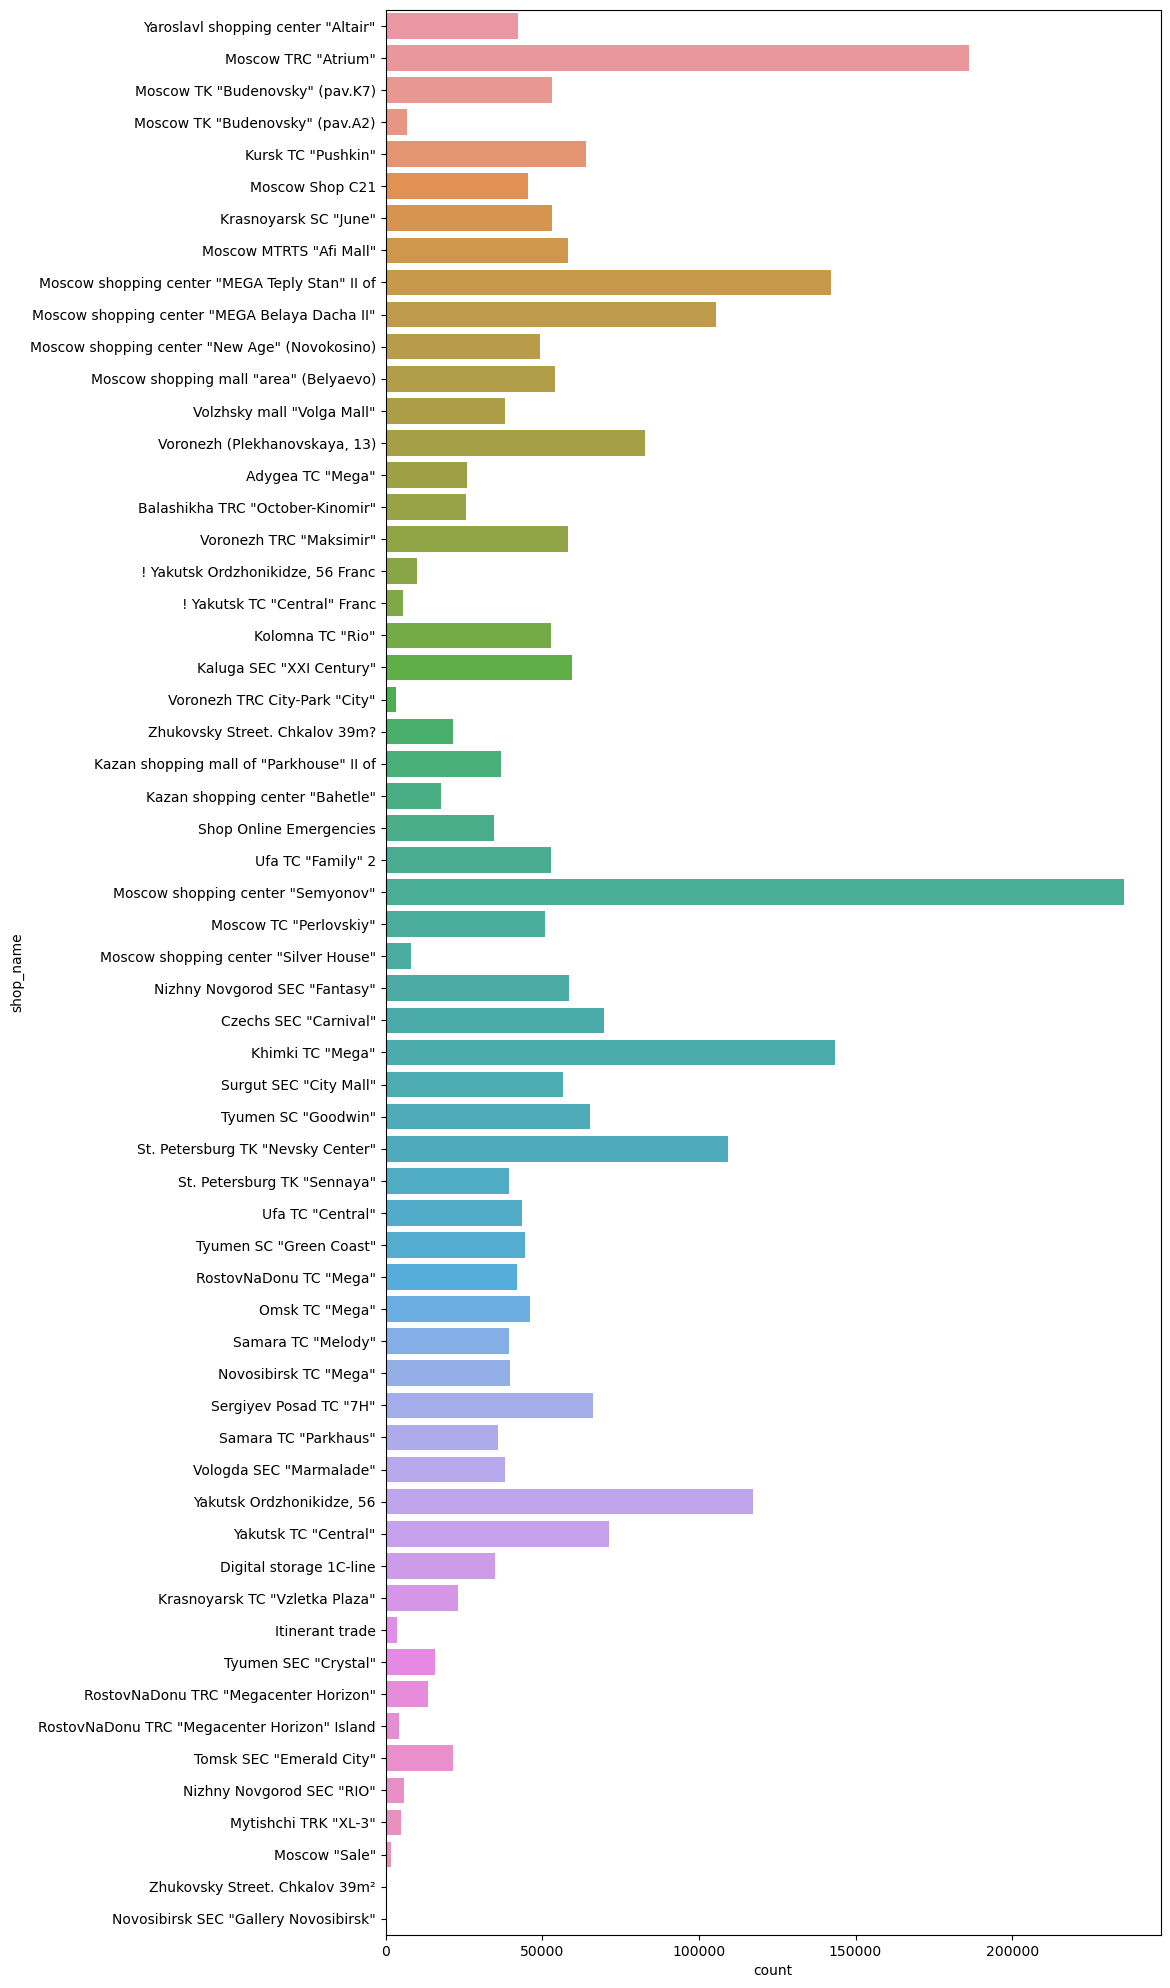

In [12]:
plt.figure(figsize=(10, 25))
sns.countplot(y = df_eda.shop_name)

plt.show()

In [13]:
df_eda.shop_name.apply(lambda x: x.split(' ')[0]).unique()

array(['Yaroslavl', 'Moscow', 'Kursk', 'Krasnoyarsk', 'Volzhsky',
       'Voronezh', 'Adygea', 'Balashikha', '!', 'Kolomna', 'Kaluga',
       'Zhukovsky', 'Kazan', 'Shop', 'Ufa', 'Nizhny', 'Czechs', 'Khimki',
       'Surgut', 'Tyumen', 'St.', 'RostovNaDonu', 'Omsk', 'Samara',
       'Novosibirsk', 'Sergiyev', 'Vologda', 'Yakutsk', 'Digital',
       'Itinerant', 'Tomsk', 'Mytishchi'], dtype=object)

In [14]:
df_eda[ df_eda.shop_name.apply(lambda x: x.split(' ')[0]) == "!"]

,date,date_block_num,item_price,item_cnt_day,shop_name,item_name,item_category_name
37589,2013-12-01,0,73.0,1.0,"! Yakutsk Ordzhonikidze, 56 Franc",ДИВЕРСАНТ:КОНЕЦ ВОЙНЫ (регион),Movie - DVD
37590,2013-01-22,0,73.0,1.0,"! Yakutsk Ordzhonikidze, 56 Franc",ДИВЕРСАНТ:КОНЕЦ ВОЙНЫ (регион),Movie - DVD
37591,2013-01-26,0,73.0,1.0,"! Yakutsk Ordzhonikidze, 56 Franc",ДИВЕРСАНТ:КОНЕЦ ВОЙНЫ (регион),Movie - DVD
37592,2013-12-01,0,170.0,1.0,"! Yakutsk Ordzhonikidze, 56 Franc",Дидюля Grand Collection (mp3-CD) (Jewel),Music - MP3
37593,2013-01-22,0,170.0,1.0,"! Yakutsk Ordzhonikidze, 56 Franc",Дидюля Grand Collection (mp3-CD) (Jewel),Music - MP3
...,...,...,...,...,...,...,...
183257,2013-02-22,1,1228.0,2.0,"! Yakutsk Ordzhonikidze, 56 Franc","Kit ""Invizimals: The Lost tribes [PSP, Russian...",Games - PSP
183258,2013-02-21,1,1228.0,1.0,"! Yakutsk Ordzhonikidze, 56 Franc","Kit ""Invizimals: The Lost tribes [PSP, Russian...",Games - PSP
183259,2013-02-20,1,1228.0,1.0,"! Yakutsk Ordzhonikidze, 56 Franc","Kit ""Invizimals: The Lost tribes [PSP, Russian...",Games - PSP
183260,2013-02-17,1,1228.0,1.0,"! Yakutsk Ordzhonikidze, 56 Franc","Kit ""Invizimals: The Lost tribes [PSP, Russian...",Games - PSP


In [24]:
s = '! Yakutsk Ordzhonikidze, 56 Franc'
s = s.split("!")[1].split(" ")[1]
print(s)

Yakutsk


In [28]:
df_eda.shop_name[ df_eda.shop_name.apply(lambda x: x.split(' ')[0]) == "St."].unique()

array(['St. Petersburg TK "Nevsky Center"', 'St. Petersburg TK "Sennaya"'],
      dtype=object)

SaintPetersburg TK "Nevsky Center"	PATROL


In [16]:
df_eda[ df_eda.shop_name.apply(lambda x: x.split(' ')[0]) == "Digital"]

# change shop name to -> Virtual Shop

,date,date_block_num,item_price,item_cnt_day,shop_name,item_name,item_category_name
503292,2013-06-05,4,119.0,1.0,Digital storage 1C-line,"Might and Magic: Heroes VI. Danse Macabre [PC,...",Games PC - Digital
503293,2013-10-05,4,119.0,3.0,Digital storage 1C-line,"Might and Magic: Heroes VI. Danse Macabre [PC,...",Games PC - Digital
503294,2013-12-05,4,119.0,3.0,Digital storage 1C-line,"Might and Magic: Heroes VI. Danse Macabre [PC,...",Games PC - Digital
503295,2013-05-14,4,119.0,1.0,Digital storage 1C-line,"Might and Magic: Heroes VI. Danse Macabre [PC,...",Games PC - Digital
503296,2013-05-16,4,119.0,2.0,Digital storage 1C-line,"Might and Magic: Heroes VI. Danse Macabre [PC,...",Games PC - Digital
...,...,...,...,...,...,...,...
2905562,2015-10-19,33,499.0,1.0,Digital storage 1C-line,"Call of Duty: Black Ops II [PC, Digital Version]",Games PC - Digital
2905563,2015-10-30,33,499.0,1.0,Digital storage 1C-line,"Call of Duty: Black Ops II [PC, Digital Version]",Games PC - Digital
2905564,2015-10-14,33,499.0,1.0,Digital storage 1C-line,"Call of Duty: Modern Warfare 3 [PC, Цифровая в...",Games PC - Digital
2905565,2015-10-24,33,249.0,1.0,Digital storage 1C-line,Call of Duty: Modern Warfare 3. Content collec...,Games PC - Digital


In [45]:
cities = []
for shop in df_eda.shop_name:
    shop_name = shop.split(" ")[0]
    if shop_name =="!":
        city = shop.split("!")[1].split(" ")[1]
    elif shop_name == "St.":
        city = "Saint Petersburg"
    elif (shop_name == "Digital" or shop_name == "Shop") :
        city = 'Virtual Shop'
    else:
        city = shop_name
        
    cities.append(city)

In [46]:
df_eda['cities'] = cities
df_eda.cities.unique()

array(['Yaroslavl', 'Moscow', 'Kursk', 'Krasnoyarsk', 'Volzhsky',
       'Voronezh', 'Adygea', 'Balashikha', 'Yakutsk', 'Kolomna', 'Kaluga',
       'Zhukovsky', 'Kazan', 'Virtual Shop', 'Ufa', 'Nizhny', 'Czechs',
       'Khimki', 'Surgut', 'Tyumen', 'Saint Petersburg', 'RostovNaDonu',
       'Omsk', 'Samara', 'Novosibirsk', 'Sergiyev', 'Vologda',
       'Itinerant', 'Tomsk', 'Mytishchi'], dtype=object)

In [50]:
top_10_selling_city = df_eda['cities'].value_counts().head(10)
top_10_selling_city = top_10_selling_city.to_frame().reset_index()
top_10_selling_city.columns = ['city', 'count']
top_10_selling_city

,city,count
0,Moscow,996636
1,Yakutsk,204404
2,Saint Petersburg,148535
3,Voronezh,144151
4,Khimki,143480
5,Tyumen,125455
6,Ufa,96423
7,Krasnoyarsk,76177
8,Samara,75421
9,Czechs,69573


In [51]:
# Getting the sum of sales in top 10 cities
all_sum = top_10_selling_city['count'].sum()

# Count the percentage of of sales to the top 10 cities.
percentage = []
for i in top_10_selling_city['count']:
    percentage.append(i/all_sum*100)

# Create the column with persentages
top_10_selling_city['percentage'] = percentage

# Take a look at what we have
top_10_selling_city


,city,count,percentage
0,Moscow,996636,47.909319
1,Yakutsk,204404,9.825911
2,Saint Petersburg,148535,7.140230
3,Voronezh,144151,6.929487
4,Khimki,143480,6.897231
5,Tyumen,125455,6.030751
6,Ufa,96423,4.635153
7,Krasnoyarsk,76177,3.661907
8,Samara,75421,3.625565
9,Czechs,69573,3.344446


In [72]:
top_categories_in_cities = []

for i in list(df_eda['cities'].unique()):
    groupped_by_product_category = df_eda[df_eda['cities'] == i].groupby('item_category_name')['item_cnt_day'].sum()
    groupped_by_product_category = groupped_by_product_category.sort_values(ascending=False).to_frame().reset_index()
    groupped_by_product_category = groupped_by_product_category.iloc[0:1].values.flatten().tolist()
    groupped_by_product_category.append(i)
    top_categories_in_cities.append(groupped_by_product_category)



In [86]:
df_top_categories_in_cities = pd.DataFrame(top_categories_in_cities, columns = ['category_name', 'count', 'city'])
df_top_categories_in_cities

,category_name,count,city
0,Games PC - Standard Edition,10127.0,Yaroslavl
1,Movie - DVD,241468.0,Moscow
2,Movie - DVD,12938.0,Kursk
3,Games - PS3,13610.0,Krasnoyarsk
4,Games PC - Standard Edition,9029.0,Volzhsky
5,Games PC - Standard Edition,26617.0,Voronezh
6,Games PC - Standard Edition,4802.0,Adygea
7,Games PC - Standard Edition,4779.0,Balashikha
8,Movie - DVD,76098.0,Yakutsk
9,Movie - DVD,9804.0,Kolomna


In [87]:
df_top_categories_in_cities = df_top_categories_in_cities[['category_name', 'city']]
df_top_categories_in_cities

,category_name,city
0,Games PC - Standard Edition,Yaroslavl
1,Movie - DVD,Moscow
2,Movie - DVD,Kursk
3,Games - PS3,Krasnoyarsk
4,Games PC - Standard Edition,Volzhsky
5,Games PC - Standard Edition,Voronezh
6,Games PC - Standard Edition,Adygea
7,Games PC - Standard Edition,Balashikha
8,Movie - DVD,Yakutsk
9,Movie - DVD,Kolomna


In [89]:
df_top_categories_in_cities = df_top_categories_in_cities.groupby('category_name').agg({'city': ' '.join}).reset_index()
df_top_categories_in_cities

,category_name,city
0,Games - PS3,Krasnoyarsk
1,Games PC - Digital,Virtual Shop
2,Games PC - Standard Edition,Yaroslavl Volzhsky Voronezh Adygea Balashikha ...
3,Movie - DVD,Moscow Kursk Yakutsk Kolomna Kazan Czechs Khim...
4,Music - CD of local production,Novosibirsk Tomsk


In [92]:
sale_train['date'] = pd.to_datetime(sale_train['date'], format='%d.%m.%Y')
sale_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [93]:
pivot_train = sale_train.pivot_table(index=['shop_id', 'item_id'], columns='date_block_num', values='item_cnt_day', aggfunc='sum').fillna(0.0)
pivot_train.head()


date_block_num    0     1    2    3    4    5    6    7    8    9   ...   24  \
shop_id item_id                                                     ...        
0       30       0.0  31.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        31       0.0  11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        32       6.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        33       3.0   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        35       1.0  14.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

date_block_num    25   26   27   28   29   30   31   32   33  
shop_id item_id                                               
0       30       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        31       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        32       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        33       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        35       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 34 columns]

In [94]:
pivot_train.tail()

date_block_num    0    1    2    3    4    5    6    7    8    9   ...   24  \
shop_id item_id                                                    ...        
59      22154    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        22155    0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0   
        22162    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        22164    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        22167    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0   

date_block_num    25   26   27   28   29   30   31   32   33  
shop_id item_id                                               
59      22154    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        22155    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        22162    9.0  4.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  
        22164    2.0  1.0  2.0  0.0  0.0  1.0  0.0  0.0  0.0  
        22167    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 34 columns]

In [96]:
train_cleaned_df = pivot_train.reset_index()
train_cleaned_df

date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,30,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,31,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,32,6.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,33,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,59,22154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424120,59,22155,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424121,59,22162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
424122,59,22164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0


In [97]:
train_cleaned_df['shop_id']= train_cleaned_df.shop_id.astype('str')
train_cleaned_df['item_id']= train_cleaned_df.item_id.astype('str')

# Merge the items with categories
item_to_cat_df = item.merge(item_categories[['item_category_id','item_category_name']], how="inner", on="item_category_id")[['item_id','item_category_name']]
item_to_cat_df


,item_id,item_category_name
0,0,Movie - DVD
1,2,Movie - DVD
2,3,Movie - DVD
3,4,Movie - DVD
4,5,Movie - DVD
...,...,...
22165,22095,batteries
22166,22096,batteries
22167,22097,batteries
22168,22098,batteries


In [98]:
item_to_cat_df['item_id'] = item_to_cat_df.item_id.astype('str')


In [99]:
from sklearn import preprocessing

# Merge the train dataframe with the items + categories dataframe
train_cleaned_df = train_cleaned_df.merge(item_to_cat_df, how="inner", on="item_id")

# Create Label encoder
number = preprocessing.LabelEncoder()


In [100]:
train_cleaned_df

,shop_id,item_id,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,32,33,item_category_name
0,0,30,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Movie - DVD
1,1,30,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Movie - DVD
2,2,30,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Movie - DVD
3,3,30,0.0,4.0,5.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Movie - DVD
4,4,30,0.0,7.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Movie - DVD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,59,9760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Movies - Blu-Ray
424120,59,12846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Movies - Blu-Ray
424121,59,16270,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Program - For home and office
424122,59,17732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Games PC - Additional publications


In [101]:
# Encode the category column
train_cleaned_df['item_category_name'] = number.fit_transform(train_cleaned_df.item_category_name)
train_cleaned_df

,shop_id,item_id,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,32,33,item_category_name
0,0,30,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56
1,1,30,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56
2,2,30,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56
3,3,30,0.0,4.0,5.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,56
4,4,30,0.0,7.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,59,9760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57
424120,59,12846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57
424121,59,16270,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75
424122,59,17732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39


In [102]:
# Rearrange the columns
train_cleaned_df = train_cleaned_df[['shop_id', 'item_id', 'item_category_name'] + list(range(34))]
train_cleaned_df.head()


,shop_id,item_id,item_category_name,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,30,56,0.0,31.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,30,56,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,30,56,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,30,56,0.0,4.0,5.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,30,56,0.0,7.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
train_cleaned_df.iloc[:,  (train_cleaned_df.columns != 33)].values, train_cleaned_df.iloc[:, train_cleaned_df.columns == 33].values

(array([['0', '30', 56, ..., 0.0, 0.0, 0.0],
        ['1', '30', 56, ..., 0.0, 0.0, 0.0],
        ['2', '30', 56, ..., 0.0, 0.0, 0.0],
        ...,
        ['59', '16270', 75, ..., 0.0, 0.0, 0.0],
        ['59', '17732', 39, ..., 0.0, 0.0, 0.0],
        ['59', '18018', 62, ..., 0.0, 0.0, 0.0]], dtype=object),
 array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]))

In [107]:
train_cleaned_df.iloc[:, train_cleaned_df.columns == 33]

,33
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
424119,0.0
424120,0.0
424121,0.0
424122,0.0


In [110]:
# Set the parameters for model
param = {'max_depth': 13, 
         'subsample':1,
         'min_child_weight': 0.7,
         'eta':0.3, 
         'num_round':1000, 
         'seed':1,
         'silent':0,
         'eval_metric':'rmse',
         'n_estimators': 120}




In [111]:
import xgboost as xgb

xgbtrain = xgb.DMatrix(train_cleaned_df.iloc[:,  (train_cleaned_df.columns != 33)].values, 
                                            train_cleaned_df.iloc[:, train_cleaned_df.columns == 33].values)


In [112]:
# Train the model
bst = xgb.train(param, xgbtrain)


[10:46:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "n_estimators", "num_round", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [113]:
preds = bst.predict(xgb.DMatrix(train_cleaned_df.iloc[:,  (train_cleaned_df.columns != 33)].values))


In [114]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(preds,train_cleaned_df.iloc[:, train_cleaned_df.columns == 33].values))

print(rmse)


1.1395831453458984


In [115]:
# Preprocess the testing dataframe
apply_df = test
apply_df['shop_id'] = apply_df.shop_id.astype('str')
apply_df['item_id'] = apply_df.item_id.astype('str')

apply_df = test.merge(train_cleaned_df, how="left", on=["shop_id", "item_id"]).fillna(0.0)

# Take a quick look at testing data after preprocessing
apply_df.head()



,ID,shop_id,item_id,item_category_name,0,1,2,3,4,5,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,36.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
d = dict(zip(apply_df.columns[4:],list(np.array(list(apply_df.columns[4:])) - 1)))
d

{0: -1,
 1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32}

In [117]:
apply_df = apply_df.rename(d, axis = 1)
apply_df

,ID,shop_id,item_id,item_category_name,-1,0,1,2,3,4,...,23,24,25,26,27,28,29,30,31,32
0,0,5,5037,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,36.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,59.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,214196,45,16188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,214197,45,15757,59.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,214198,45,19648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
# Get the predictions
preds = bst.predict(xgb.DMatrix(apply_df.iloc[:, (apply_df.columns != 'ID') & (apply_df.columns != -1)].values))


In [119]:
# Get general info about our predictions
preds = list(map(lambda x: min(20, max(x,0)), list(preds)))
sub_df = pd.DataFrame({'ID': apply_df.ID, 'item_cnt_month': preds})
sub_df.describe()


,ID,item_cnt_month
count,214200.000000,214200.000000
mean,107099.500000,0.258272
std,61834.358168,0.786870
min,0.000000,0.000000
25%,53549.750000,0.082114
50%,107099.500000,0.130087
75%,160649.250000,0.186421
max,214199.000000,20.000000


In [122]:
sub_df

,ID,item_cnt_month
0,0,0.611898
1,1,0.053210
2,2,0.663127
3,3,0.083367
4,4,0.053210
...,...,...
214195,214195,0.176914
214196,214196,0.130910
214197,214197,0.053559
214198,214198,0.130910


In [ ]:
# Convert the predictions we got to the csv
sub_df.to_csv('submission.csv', index=False)